<a href="https://colab.research.google.com/github/Shashwat1524/Traffic-Signs-Detector-using-CNN/blob/main/Traffic_Sign_Detection_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, concatenate, BatchNormalization, Activation, AveragePooling2D, GlobalAveragePooling2D, Dense, Dropout


import pandas as pd
import pickle
import cv2
import random
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/My Drive/German Traffic Signs/"
os.makedirs(path, exist_ok=True)
os.chdir(path)
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 117.80 MiB | 9.75 MiB/s, done.
Updating files: 100% (4/4), done.


In [4]:
!ls german-traffic-signs/

signnames.csv  test.p  train.p	valid.p


In [5]:
np.random.seed(0)

In [6]:
with open('german-traffic-signs/train.p','rb') as f:
  train_data=pickle.load(f)

with open('german-traffic-signs/valid.p','rb') as f:
  val_data=pickle.load(f)

with open('german-traffic-signs/test.p','rb') as f:
  test_data=pickle.load(f)


In [7]:
X_train,y_train=train_data['features'],train_data['labels']
X_val,y_val=val_data['features'],val_data['labels']
X_test,y_test=test_data['features'],test_data['labels']


In [8]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(34799, 32, 32, 3)
(12630, 32, 32, 3)
(4410, 32, 32, 3)


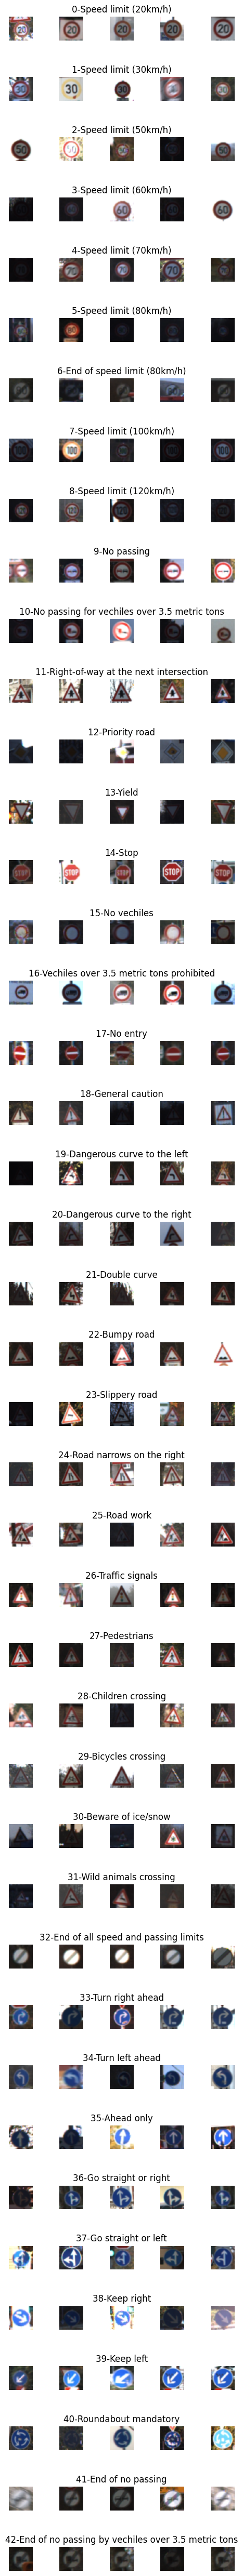

In [10]:
data=pd.read_csv('german-traffic-signs/signnames.csv')

num_of_samples = []

cols = 5
num_classes = 43

fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 50))
fig.tight_layout()
for i in range(cols):
    for j,row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j)+ "-" +row["SignName"])
            num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0, 0.5, 'Number of images')

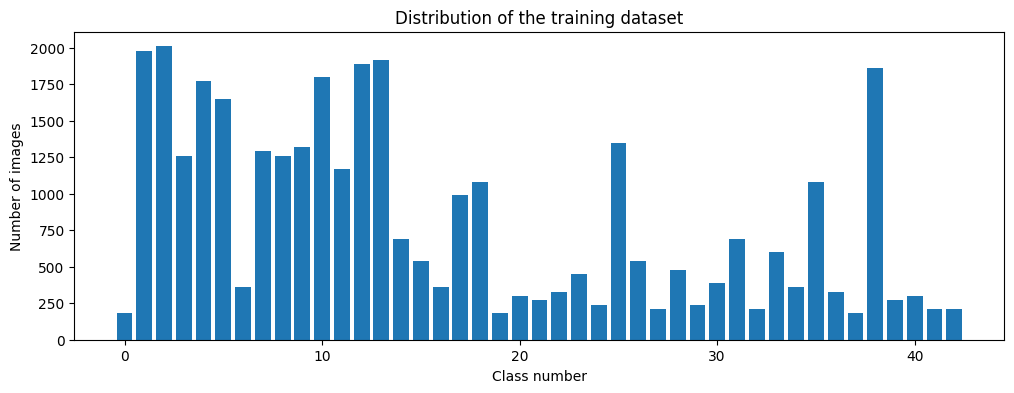

In [11]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [12]:
def grayscale(img):
  img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  return img

In [13]:
def equalize(img):
  img=cv2.equalizeHist(img)
  return img

In [14]:
def image_preprocessor(img):
  img=grayscale(img)
  img=equalize(img)
  img=img/255
  return img

In [15]:
X_train=np.array(list(map(image_preprocessor,X_train)))
X_test=np.array(list(map(image_preprocessor,X_test)))
X_val=np.array(list(map(image_preprocessor,X_val)))

In [16]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(34799, 32, 32)
(12630, 32, 32)
(4410, 32, 32)


In [17]:
X_train=X_train.reshape(34799, 32, 32,1)
X_test=X_test.reshape(12630, 32, 32,1)
X_val=X_val.reshape(4410, 32, 32,1)

(15, 32, 32, 1)


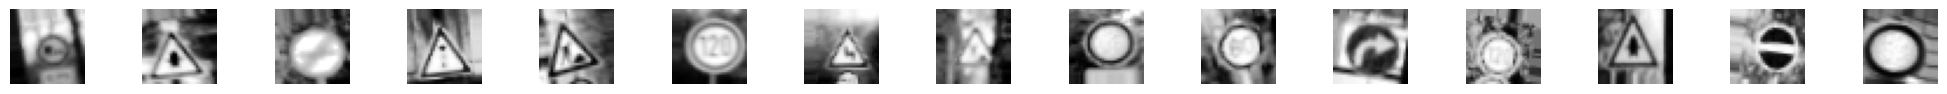

In [85]:
data_augmentation=ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1,zoom_range=0.1,shear_range=0.1,rotation_range=10.0)


In [18]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_val = to_categorical(y_val, 43)

In [127]:
def traffic_sign_detection_model():
  model = Sequential()
  model.add(Conv2D(60, (5, 5), input_shape=(32, 32, 1), activation='relu'))
  model.add(Conv2D(60, (5, 5), activation='relu'))
  model.add(Conv2D(60, (5, 5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(43, activation='softmax'))

  model.compile(Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [128]:
model=traffic_sign_detection_model()

In [129]:
print(model.summary())

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_45 (Conv2D)                   │ (None, 28, 28, 60)          │           1,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_46 (Conv2D)                   │ (None, 24, 24, 60)          │          90,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_47 (Conv2D)                   │ (None, 20, 20, 60)          │          90,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 10, 10, 60)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_48 (Conv2D)                   │ (None, 8, 8, 30)            │          16,230 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_49 (Conv2D)                   │ (None, 6, 6, 30)            │           8,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 3, 3, 30)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 270)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 500)                 │         135,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 43)                  │          21,543 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 363,083 (1.39 MB)

 Trainable params: 363,083 (1.39 MB)

 Non-trainable params: 0 (0.00 B)

None


In [122]:
h=model.fit(data_augmentation.flow(X_train,y_train,batch_size=50),steps_per_epoch=2000,epochs=10,validation_data=(X_val,y_val),shuffle=1)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 693/2000 ━━━━━━━━━━━━━━━━━━━━ 36s 28ms/step - accuracy: 0.2697 - loss: 2.6578

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - accuracy: 0.4276 - loss: 2.0429 - val_accuracy: 0.9002 - val_loss: 0.2915
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8583 - loss: 0.4585 - val_accuracy: 0.9667 - val_loss: 0.1109
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9206 - loss: 0.2619 - val_accuracy: 0.9748 - val_loss: 0.0869
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9442 - loss: 0.1820 - val_accuracy: 0.9764 - val_loss: 0.0766
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9568 - loss: 0.1437 - val_accuracy: 0.9837 - val_loss: 0.0495
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9638 - loss: 0.1207 - val_accuracy: 0.9859 - val_loss: 0.0458
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.9659 - loss: 0.1132 - val_accuracy: 0.9887 - val_loss: 0.0400
Epoch 8/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9709 - loss: 0.0960 - 

In [110]:
model.save('/content/drive/My Drive/German Traffic Signs/model.keras')

In [111]:
model=load_model('/content/drive/My Drive/German Traffic Signs/model.keras')

In [123]:
model_accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy',model_accuracy[1])

Test Accuracy 0.9618368744850159


Text(0.5, 0, 'epoch')

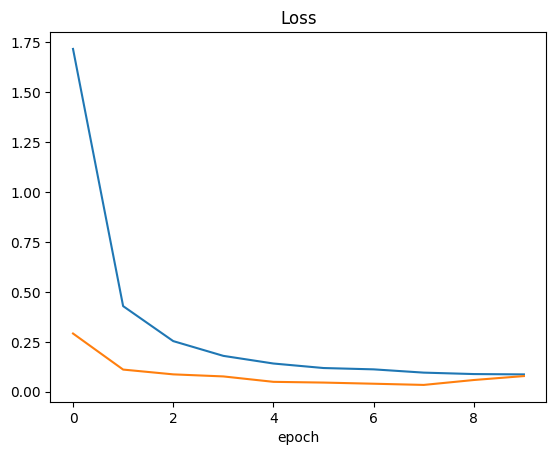

In [124]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')



Text(0.5, 0, 'epoch')

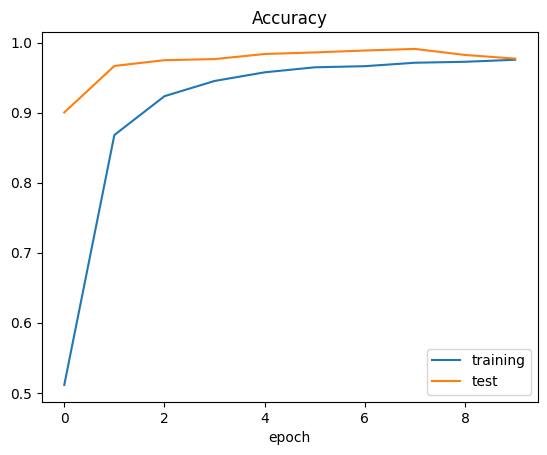

In [125]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['training','test'])
plt.title('Accuracy')
plt.xlabel('epoch')

(32, 32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
Predicted class number: 13, Sign: Yield


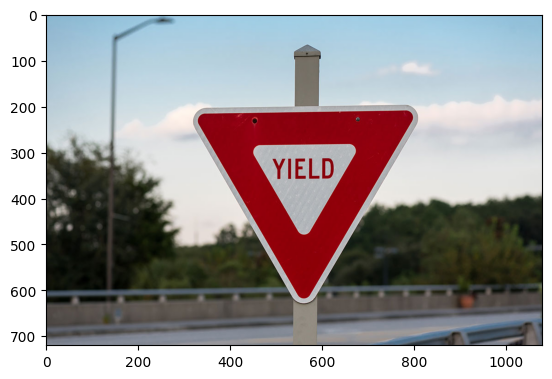

In [126]:
import requests
from PIL import Image
url = 'https://mhmlegal.com/wp-content/uploads/2024/02/MHM-Blog-feb24-failure-to-yield.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img)

img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = image_preprocessor(img)
print(img.shape)
img = img.reshape(1, 32, 32, 1)
predicted_class = np.argmax(model.predict(img))
predicted_sign_name = data.iloc[predicted_class]['SignName']  # Fetching the sign name using the predicted class index
print(f"Predicted class number: {predicted_class}, Sign: {predicted_sign_name}")